In [1]:
import numpy as np
import matplotlib.pyplot as plt

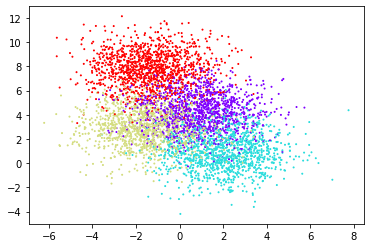

In [2]:
[X_train, y_train, X_test, y_test] = np.load("TP5a.npy",allow_pickle=True) 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=1, cmap='rainbow'); 
plt.show()

In [3]:
""" Combien y a-t-il de points dans la base d’apprentissage ? Dans la base de test ? Quelle est la dimension des données ? """

' Combien y a-t-il de points dans la base d’apprentissage ? Dans la base de test ? Quelle est la dimension des données ? '

In [5]:
print(np.shape(X_train) , " points dans la base d’apprentissage")
print(np.shape(X_test) , " points dans la base test")


(4900, 2)  points dans la base d’apprentissage
(100, 2)  points dans la base test


In [8]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree 

def visualize_classifier(model, X, y): 
  ax = plt.gca() 
# Plot the training points 
  ax.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap='rainbow', clim=(y.min(), y.max()), zorder=3)
  ax.axis('tight') 
  ax.axis('off')
  xlim = ax.get_xlim() 
  ylim = ax.get_ylim() 
  xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200)) 
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
   # Create a color plot with the results 
  n_classes = len(np.unique(y)) 
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap='rainbow', zorder=1) 
  ax.set(xlim=xlim, ylim=ylim) 
  plt.show()

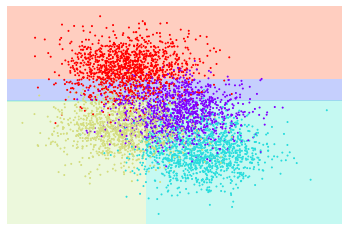

|--- feature_1 <= 5.19
|   |--- feature_0 <= -0.56
|   |   |--- class: 2
|   |--- feature_0 >  -0.56
|   |   |--- class: 1
|--- feature_1 >  5.19
|   |--- feature_1 <= 6.91
|   |   |--- class: 0
|   |--- feature_1 >  6.91
|   |   |--- class: 3



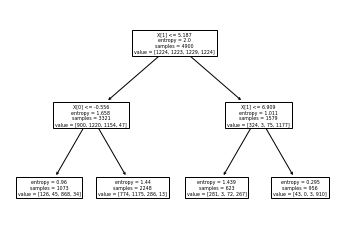

In [9]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = 2) 
tree1.fit(X_train, y_train) 
visualize_classifier(tree1, X_train, y_train) 
tree.plot_tree(tree1) 
text_representation = tree.export_text(tree1) 
print(text_representation)

Que représente la variable max_depth ? Quelles règles de décisions ont été prises ?
Faire varier max_depth de 1 à 20 (en supprimant les 3 dernières lignes) et commenter les résultats obtenus visuellement. Retrouvez-vous toutes les découpes ?

la variable max_depth represente la taille de l'arbre (profondeur max) en compatant à partir de la racine 

decisions prises : 

|--- feature_1 <= 5.19 (si la feature 1 est inferieure ou egale a 5.19)\
|   |--- feature_0 <= -0.56 (ET si la feature 0 est inferieure ou egale a -0.56) ect..\
|   |   |--- class: 2\
|   |--- feature_0 >  -0.56\
|   |   |--- class: 1\
|--- feature_1 >  5.19\
|   |--- feature_1 <= 6.91\
|   |   |--- class: 0\
|   |--- feature_1 >  6.91\
|   |   |--- class: 3 \

In [ ]:
 # Faire varier max_depth de 1 à 20 (en supprimant les 3 dernières lignes) et commenter les résultats obtenus visuellement. Retrouvez-vous toutes les découpes ?

In [14]:
"""for i in range(1,21) :  
  tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = i) 
  tree1.fit(X_train, y_train) 
  visualize_classifier(tree1, X_train, y_train) """

"for i in range(1,21) :  \n  tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = i) \n  tree1.fit(X_train, y_train) \n  visualize_classifier(tree1, X_train, y_train) "

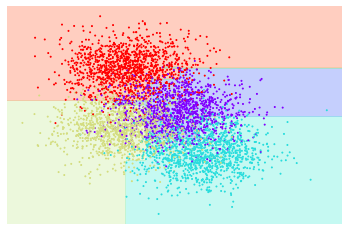

|--- feature_1 <= 5.19
|   |--- feature_0 <= -0.56
|   |   |--- feature_1 <= 3.31
|   |   |   |--- feature_1 <= 1.19
|   |   |   |   |--- feature_0 <= -1.49
|   |   |   |   |   |--- feature_1 <= 0.67
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_1 >  0.67
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  -1.49
|   |   |   |   |   |--- feature_1 <= 0.14
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.14
|   |   |   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  1.19
|   |   |   |   |--- feature_0 <= -1.50
|   |   |   |   |   |--- feature_0 <= -3.27
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_0 >  -3.27
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  -1.50
|   |   |   |   |   |--- feature_0 <= -0.79
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_0 >  -0.79
|   |   |   |   |   |   |--- class: 2
|   |   |--- feature_1 >  3.31
|   |

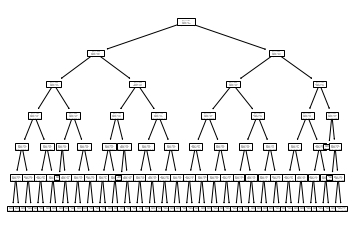

In [16]:
""" On prends max_depth  = 6 , la valeur qui a le meilleur taux de classification """ 
""" le taux de reconnaissance est visuellement indetectable """ 

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = 6) 
tree1.fit(X_train, y_train) 
visualize_classifier(tree1, X_train, y_train) 
tree.plot_tree(tree1) 
text_representation = tree.export_text(tree1) 
print(text_representation)

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

y_pred = tree1.predict(X_test) 
C=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred)) 
print('Accuracy= ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.62      0.60        26
           1       0.83      0.89      0.86        27
           2       0.71      0.57      0.63        21
           3       0.85      0.88      0.87        26

    accuracy                           0.75       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.75      0.75      0.75       100

Accuracy=  0.75


precision == precision avec laquelle les elements de classe i sont bien classés\
recall == sensibilité 
f1 - score == spécificité

In [ ]:
""" Pouvez-vous retrouver la première ligne à partir de la matrice de confusion """ 

In [38]:


C =confusion_matrix(y_test, y_pred)
print(C)
print("\n")
print(" precision =  ", C[0,0]/(C[1,0] + C[2,0] + C[3,0] ))
# La precision est tjrs relative à une classe 


[[18  0  5  3]
 [ 6 21  0  0]
 [ 5  3 12  1]
 [ 3  0  0 23]]


 precision =   1.2857142857142858


In [ ]:
""" Faire varier max_depth et estimer pour chaque valeur le taux de reconnaissance. 
Conclusion sur l’évolution du taux de reconnaissance en fonction de la profondeur de l’arbre """

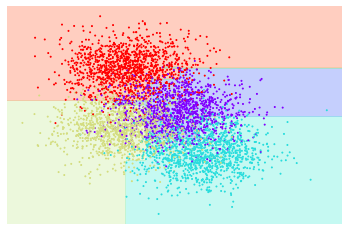

taux de reconnaissance :  4.6875




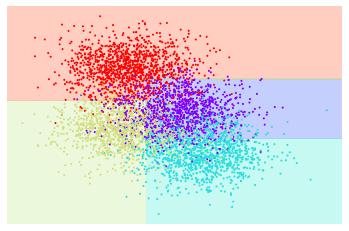

taux de reconnaissance :  4.625


In [37]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = 6) 
tree1.fit(X_train, y_train) 
visualize_classifier(tree1, X_train, y_train) 
y_pred = tree1.predict(X_test) 
C =confusion_matrix(y_test, y_pred)
print ("taux de reconnaissance : " , np.trace(C) / (C.shape[0]*C.shape[1])  )

print("\n")

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = 3) 
tree1.fit(X_train, y_train) 
visualize_classifier(tree1, X_train, y_train) 
y_pred = tree1.predict(X_test) 
C =confusion_matrix(y_test, y_pred)
print ("taux de reconnaissance : " , np.trace(C) / (C.shape[0]*C.shape[1])  )

In [51]:
Taux_rec = [] # Taux de reconnaissance 

for i in range(1,21) : 
  tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = i) 
  tree1.fit(X_train, y_train) 
  y_pred = tree1.predict(X_test) 
  C =confusion_matrix(y_test, y_pred)
  Taux_rec.append(np.trace(C) / sum(sum(C)))


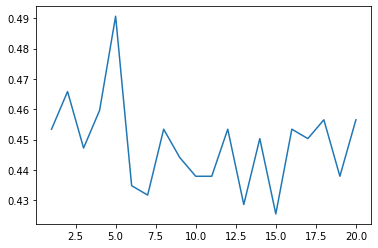

In [50]:
array = [ i for i in range(1,21)]
plt.plot( array , Taux_rec)

In [39]:
[X_train, y_train, X_test, y_test] = np.load("TP5b.npy",allow_pickle=True)

In [40]:
print(np.shape(X_train) , " points dans la base d’apprentissage")
print(np.shape(X_test) , " points dans la base test")

(966, 50)  points dans la base d’apprentissage
(322, 50)  points dans la base test


In [42]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1) 
RF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=1)